In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from RNA import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # paramètres de défault des plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)
# l'objet de notre modele (reseau de neurones)
rna = RNA()

In [3]:
# Chargement des données à partir des fichiers '*.h5' se trouvant dans le répértoire './datasets'
train_x_orig, train_y, test_x_orig, test_y, classes = rna.load_data()

In [4]:
# Explorons le jeu de données 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Nombre d'exemples d'entraînement: m_train = " + str(m_train))
print ("Nombre d'exemples de test: m_test = " + str(m_test))
print ("Hauteur/Largeur de chaque image: num_px = " + str(num_px))
print ("Chaque image est de la forme: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig de taille: " + str(train_x_orig.shape))
print ("train_y de taille: " + str(train_y.shape))
print ("test_x_orig de taille: " + str(test_x_orig.shape))
print ("test_y de taille: " + str(test_y.shape))

Nombre d'exemples d'entraînement: m_train = 209
Nombre d'exemples de test: m_test = 50
Hauteur/Largeur de chaque image: num_px = 64
Chaque image est de la forme: (64, 64, 3)
train_x_orig de taille: (209, 64, 64, 3)
train_y de taille: (1, 209)
test_x_orig de taille: (50, 64, 64, 3)
test_y de taille: (1, 50)


In [5]:
# Aplatir les images des jeux de données d'entraînement et de test 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # Le "-1" permet à 'reshape' d'aplatir les dimensions restantesThe "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Normaliser les données pour avoir des valeurs de caractéristiques comprises entre 0 et 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("taille de train_x: " + str(train_x.shape))
print ("taille de test_x : " + str(test_x.shape))

taille de train_x: (12288, 209)
taille de test_x : (12288, 50)


In [6]:
### CONSTANTES DU MODELE ####
layers_dims = [12288, 20, 7, 5, 1] #  modèle à 4-couches dans ce projet

Coût après l'itération 0: 0.771749
Coût après l'itération 100: 0.672053
Coût après l'itération 200: 0.648263
Coût après l'itération 300: 0.611507
Coût après l'itération 400: 0.567047
Coût après l'itération 500: 0.540138
Coût après l'itération 600: 0.527930
Coût après l'itération 700: 0.465477
Coût après l'itération 800: 0.369126
Coût après l'itération 900: 0.391747
Coût après l'itération 1000: 0.315187
Coût après l'itération 1100: 0.272700
Coût après l'itération 1200: 0.237419
Coût après l'itération 1300: 0.199601
Coût après l'itération 1400: 0.189263
Coût après l'itération 1500: 0.161189
Coût après l'itération 1600: 0.148214
Coût après l'itération 1700: 0.137775
Coût après l'itération 1800: 0.129740
Coût après l'itération 1900: 0.121225
Coût après l'itération 2000: 0.113821
Coût après l'itération 2100: 0.107839
Coût après l'itération 2200: 0.102855
Coût après l'itération 2300: 0.100897
Coût après l'itération 2400: 0.092878


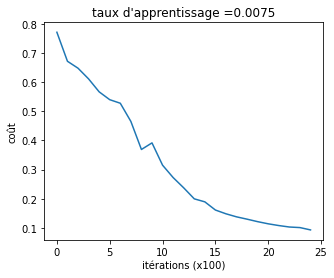

In [7]:
parametres = rna.L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [8]:
# précision d'entraînement = nombre d'images correctement classées/nombre total d'images d'entraînement

pred_train = rna.predict(train_x, train_y, parametres)

Accuracy: 0.9856459330143541


In [9]:
pred_test = rna.predict(test_x, test_y, parametres)

Accuracy: 0.8


Accuracy: 1.0
y = 1, votre algorithme prédit que cette image représente un "chat"


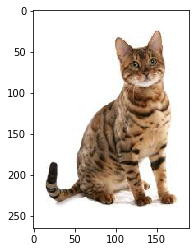

In [18]:
rna.test_image("download.jpg", parametres, classes)